## 特征工程  

### 数据预处理

In [46]:
import numpy as np 
import pandas as pd 
import warnings 
import seaborn as sns
from matplotlib import pyplot as plt 
warnings.filterwarnings("ignore")

train_url = '../data/application_train.csv'
test_url = '../data/application_test.csv'
des_url = '../data/feature_description.csv'

train = pd.read_csv(train_url, encoding = "")
test = pd.read_csv(test_url, encoding = "")
feature_des = pd.read_csv(des_url)

nfeatures = set(feature_des[(feature_des.Dtype == 'int64') | (feature_des.Dtype == 'float64')].Row)
cfeatures = set(feature_des[feature_des.Dtype == 'object'].Row)
for feature in feature_des.Row:
    if train[feature].nunique() < 10:
        if feature not in cfeatures:
            cfeatures.add(feature)
        if feature in nfeatures:
            nfeatures.remove(feature)
print('数值特征:', nfeatures)
print('类别特征:', cfeatures)

数值特征: {'EXT_SOURCE_1', 'APARTMENTS_AVG', 'TOTALAREA_MODE', 'AMT_REQ_CREDIT_BUREAU_QRT', 'BASEMENTAREA_AVG', 'NONLIVINGAPARTMENTS_MODE', 'COMMONAREA_AVG', 'YEARS_BUILD_MEDI', 'LANDAREA_MEDI', 'APARTMENTS_MODE', 'EXT_SOURCE_3', 'DEF_30_CNT_SOCIAL_CIRCLE', 'YEARS_BUILD_MODE', 'LANDAREA_AVG', 'FLOORSMIN_AVG', 'APARTMENTS_MEDI', 'COMMONAREA_MEDI', 'CNT_CHILDREN', 'ENTRANCES_AVG', 'HOUR_APPR_PROCESS_START', 'DAYS_LAST_PHONE_CHANGE', 'NONLIVINGAREA_MEDI', 'NONLIVINGAREA_AVG', 'OWN_CAR_AGE', 'ENTRANCES_MODE', 'AMT_INCOME_TOTAL', 'LIVINGAPARTMENTS_MEDI', 'OBS_30_CNT_SOCIAL_CIRCLE', 'CNT_FAM_MEMBERS', 'FLOORSMAX_MEDI', 'DAYS_BIRTH', 'LIVINGAPARTMENTS_AVG', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'NONLIVINGAREA_MODE', 'AMT_CREDIT', 'ENTRANCES_MEDI', 'DAYS_ID_PUBLISH', 'YEARS_BEGINEXPLUATATION_MODE', 'LIVINGAREA_MODE', 'LANDAREA_MODE', 'LIVINGAREA_AVG', 'SK_ID_CURR', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_AVG', 'FLOORSMIN_MODE', 'YEARS_BEGINEXPLUATATION_AVG', 'REGION_POPULATION_RELATIVE', 'ELEVATORS_MODE',

#### 缺失值处理  
EDA中已包含，也可在后续编码过程中处理  

#### 异常值处理  
EDA中已包含，也可在后续编码过程中处理  

In [2]:
train = train[train.CODE_GENDER.isin(['F', 'M'])].reset_index(drop = True)

#### 类别特征编码  
类别变量无法直接输入模型，需要转换为模型可以识别的形式  

##### 标签编码 Label Encoder  
适用于有序的类别变量  
1列 => 1列[0,n-1]的整数，每个整数代表一种枚举值  
sklearn.preprocessing.LabelEncoder  


In [47]:
## pip install sklearn
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
feature = 'OCCUPATION_TYPE'

encoder.fit(train[feature])
train[feature + '_encode'] = encoder.transform(train[feature])
train[[feature, feature + '_encode']].head(10)

,OCCUPATION_TYPE,OCCUPATION_TYPE_encode
0,Laborers,8
1,Core staff,3
2,Laborers,8
3,Laborers,8
4,Core staff,3
5,Laborers,8
6,Accountants,0
7,Managers,10
8,NaN,18
9,Laborers,8


##### 独热编码 One-hot  
适用于枚举值不多的无序变量    
1列 => n(或n-1)列0-1变量，表示该行数据是否属于某个枚举值  
sklearn.preprocessing.OneHotEncoder

In [48]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output  = False)
feature = 'OCCUPATION_TYPE'

encoder.fit(train[[feature]])
# feature_names = [feature + '_' + str(i) for i in range(len(encoder.categories_[0]))]
feature_names = [feature + '_' + str(cat) for cat in encoder.categories_[0]]
train[feature_names] = encoder.transform(train[[feature]])
train[feature_names]

,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_nan
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
307507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
307508,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307509,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### 目标编码 Target Encoder  
适用于枚举值多的无序变量  
二分类任务中，1列 => 1列[0,1]的概率，表示每个枚举值对应的y=1的频率  
sklearn.preprocessing.TargetEncoder  

In [49]:
from sklearn.preprocessing import TargetEncoder
encoder = TargetEncoder()
feature = 'OCCUPATION_TYPE'
target = 'TARGET'

encoder.fit(train[[feature]], train[target])
train[feature + '_encode'] = encoder.transform(train[[feature]])
train[[feature, feature + '_encode']].head(10)

,OCCUPATION_TYPE,OCCUPATION_TYPE_encode
0,Laborers,0.105787
1,Core staff,0.063040
2,Laborers,0.105787
3,Laborers,0.105787
4,Core staff,0.063040
5,Laborers,0.105787
6,Accountants,0.048305
7,Managers,0.062141
8,NaN,0.065131
9,Laborers,0.105787


##### WOE  Weight of Evidence
适用于枚举值多的无序变量  
二分类任务中，1列 => 1列数字  
$  
WOE_i=ln(\frac{count_i(y=1)}{count(y=1)})-ln(\frac{count_i(y=0)}{count(y=0)}) 
$  
category_encoders.WOEEncoder

In [50]:
## pip install category_encoders
from category_encoders import WOEEncoder
feature = 'OCCUPATION_TYPE'
woe = WOEEncoder(cols=[feature])
y = train.TARGET
train[feature + '_encode'] = woe.fit_transform(train[feature], y)
train[[feature, feature + '_encode']].head(10)

,OCCUPATION_TYPE,OCCUPATION_TYPE_encode
0,Laborers,0.298054
1,Core staff,-0.265930
2,Laborers,0.298054
3,Laborers,0.298054
4,Core staff,-0.265930
5,Laborers,0.298054
6,Accountants,-0.546335
7,Managers,-0.281091
8,NaN,-0.231453
9,Laborers,0.298054


##### 汇总

In [51]:
from sklearn.preprocessing import OneHotEncoder

def encode(train, test, target, feature, method):
    encoder = LabelEncoder()
    X_train = train[[feature]]
    X_test = test[[feature]]
    y = train[target]
    new_features = []

    if method == 'label':
        encoder = LabelEncoder(handle_unknown = 'ignore')
        encoder.fit(X_train)
        train[feature + '_encode'] = encoder.transform(X_train)
        test[feature + '_encode'] = encoder.transform(X_test)
        new_features.append(feature + '_encode')

    elif method == 'one-hot':
        encoder = OneHotEncoder(sparse_output  = False, handle_unknown = 'ignore')
        encoder.fit(X_train)
        feature_names = [feature + '_' + str(i) for i in range(len(encoder.categories_[0]))]
        train[feature_names] = encoder.transform(X_train)
        test[feature_names] = encoder.transform(X_test)
        new_features = feature_names

    elif method == 'target':
        encoder = TargetEncoder()
        encoder.fit(X_train, y)
        train[feature + '_encode'] = encoder.transform(X_train)
        test[feature + '_encode'] = encoder.transform(X_test)
        new_features.append(feature + '_encode')

    elif method == 'woe':
        encoder = WOEEncoder()
        encoder.fit(X_train, y)
        train[feature + '_encode'] = encoder.transform(X_train)
        test[feature + '_encode'] = encoder.transform(X_test)
        new_features.append(feature + '_encode')

    return new_features

method = 'one-hot'
c_encode_features = []
for feature in cfeatures: 
    new_features = encode(train, test, 'TARGET', feature, method)
    c_encode_features.extend(new_features)

print("编码后的训练集数据")
display(train[c_encode_features].head(10))

print("编码后的测试集数据")
display(test[c_encode_features].head(10))

编码后的训练集数据


,FLAG_DOCUMENT_21_0,FLAG_DOCUMENT_21_1,FLAG_MOBIL_0,FLAG_MOBIL_1,NAME_EDUCATION_TYPE_0,NAME_EDUCATION_TYPE_1,NAME_EDUCATION_TYPE_2,NAME_EDUCATION_TYPE_3,NAME_EDUCATION_TYPE_4,FLAG_PHONE_0,...,FONDKAPREMONT_MODE_1,FONDKAPREMONT_MODE_2,FONDKAPREMONT_MODE_3,FONDKAPREMONT_MODE_4,REG_CITY_NOT_WORK_CITY_0,REG_CITY_NOT_WORK_CITY_1,FLAG_DOCUMENT_19_0,FLAG_DOCUMENT_19_1,FLAG_DOCUMENT_15_0,FLAG_DOCUMENT_15_1
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
6,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
8,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
9,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0


编码后的测试集数据


,FLAG_DOCUMENT_21_0,FLAG_DOCUMENT_21_1,FLAG_MOBIL_0,FLAG_MOBIL_1,NAME_EDUCATION_TYPE_0,NAME_EDUCATION_TYPE_1,NAME_EDUCATION_TYPE_2,NAME_EDUCATION_TYPE_3,NAME_EDUCATION_TYPE_4,FLAG_PHONE_0,...,FONDKAPREMONT_MODE_1,FONDKAPREMONT_MODE_2,FONDKAPREMONT_MODE_3,FONDKAPREMONT_MODE_4,REG_CITY_NOT_WORK_CITY_0,REG_CITY_NOT_WORK_CITY_1,FLAG_DOCUMENT_19_0,FLAG_DOCUMENT_19_1,FLAG_DOCUMENT_15_0,FLAG_DOCUMENT_15_1
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
6,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
8,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
9,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0


#### 连续特征离散化  
多配合线性模型使用  
连续特征可以通过分箱的方式离散化  
离散化后同样可以进行类别特征编码  
这样做可以有效处理异常值，也可以将非线性特征转化为线性特征  

##### 等距分箱 不常用  
每组数据的间距一致  
pandas.cut

In [52]:
feature = 'AMT_CREDIT'
train[feature + '_bin'], bins = pd.cut(train[feature], 3, retbins = True)
print("分箱阈值")
display(bins)
print("每箱数据量")
display(train.groupby(feature + '_bin').TARGET.count())
print("离散化后的数据")
display(train[[feature, feature + '_bin']].head(10))

分箱阈值


array([  40995., 1380000., 2715000., 4050000.])

每箱数据量


AMT_CREDIT_bin
(40995.0, 1380000.0]      294142
(1380000.0, 2715000.0]     13325
(2715000.0, 4050000.0]        44
Name: TARGET, dtype: int64

离散化后的数据


,AMT_CREDIT,AMT_CREDIT_bin
0,406597.5,"(40995.0, 1380000.0]"
1,1293502.5,"(40995.0, 1380000.0]"
2,135000.0,"(40995.0, 1380000.0]"
3,312682.5,"(40995.0, 1380000.0]"
4,513000.0,"(40995.0, 1380000.0]"
5,490495.5,"(40995.0, 1380000.0]"
6,1560726.0,"(1380000.0, 2715000.0]"
7,1530000.0,"(1380000.0, 2715000.0]"
8,1019610.0,"(40995.0, 1380000.0]"
9,405000.0,"(40995.0, 1380000.0]"


##### 等频分箱  常用  
每组数据数据量一致  
pandas.qcut  

In [53]:
feature = 'AMT_CREDIT'
train[feature + '_bin'], bins = pd.qcut(train[feature], 3, retbins = True)
print("分箱阈值")
display(bins)
print("每箱数据量")
display(train.groupby(feature + '_bin').TARGET.count())
print("离散化后的数据")
display(train[[feature, feature + '_bin']].head(10))

分箱阈值


array([  45000.,  337500.,  679500., 4050000.])

每箱数据量


AMT_CREDIT_bin
(44999.999, 337500.0]    103745
(337500.0, 679500.0]     102172
(679500.0, 4050000.0]    101594
Name: TARGET, dtype: int64

离散化后的数据


,AMT_CREDIT,AMT_CREDIT_bin
0,406597.5,"(337500.0, 679500.0]"
1,1293502.5,"(679500.0, 4050000.0]"
2,135000.0,"(44999.999, 337500.0]"
3,312682.5,"(44999.999, 337500.0]"
4,513000.0,"(337500.0, 679500.0]"
5,490495.5,"(337500.0, 679500.0]"
6,1560726.0,"(679500.0, 4050000.0]"
7,1530000.0,"(679500.0, 4050000.0]"
8,1019610.0,"(679500.0, 4050000.0]"
9,405000.0,"(337500.0, 679500.0]"


##### 决策树分箱  
基于决策树分裂标准(信息增益率、Gini)进行分箱，每个叶子节点为一组  

##### 汇总  

In [34]:
nbins = 5
method = 'one-hot'
n_encode_features = []

for feature in nfeatures:
    train[feature + '_bin'], bins = pd.qcut(train[feature], nbins, duplicates = 'drop', retbins = True, labels = False)
    test[feature + '_bin'] = pd.cut(test[feature], bins, labels = False)
    new_features = encode(train, test, 'TARGET', feature + '_bin', method)
    n_encode_features.extend(new_features)

print("编码后的训练集数据")
display(train[n_encode_features].head(10))

print("编码后的测试集数据")
display(test[n_encode_features].head(10))

编码后的训练集数据


,EXT_SOURCE_1_bin_0,EXT_SOURCE_1_bin_1,EXT_SOURCE_1_bin_2,EXT_SOURCE_1_bin_3,EXT_SOURCE_1_bin_4,EXT_SOURCE_1_bin_5,APARTMENTS_AVG_bin_0,APARTMENTS_AVG_bin_1,APARTMENTS_AVG_bin_2,APARTMENTS_AVG_bin_3,...,BASEMENTAREA_MEDI_bin_2,BASEMENTAREA_MEDI_bin_3,BASEMENTAREA_MEDI_bin_4,BASEMENTAREA_MEDI_bin_5,AMT_GOODS_PRICE_bin_0,AMT_GOODS_PRICE_bin_1,AMT_GOODS_PRICE_bin_2,AMT_GOODS_PRICE_bin_3,AMT_GOODS_PRICE_bin_4,AMT_GOODS_PRICE_bin_5
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


编码后的测试集数据


,EXT_SOURCE_1_bin_0,EXT_SOURCE_1_bin_1,EXT_SOURCE_1_bin_2,EXT_SOURCE_1_bin_3,EXT_SOURCE_1_bin_4,EXT_SOURCE_1_bin_5,APARTMENTS_AVG_bin_0,APARTMENTS_AVG_bin_1,APARTMENTS_AVG_bin_2,APARTMENTS_AVG_bin_3,...,BASEMENTAREA_MEDI_bin_2,BASEMENTAREA_MEDI_bin_3,BASEMENTAREA_MEDI_bin_4,BASEMENTAREA_MEDI_bin_5,AMT_GOODS_PRICE_bin_0,AMT_GOODS_PRICE_bin_1,AMT_GOODS_PRICE_bin_2,AMT_GOODS_PRICE_bin_3,AMT_GOODS_PRICE_bin_4,AMT_GOODS_PRICE_bin_5
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [11]:
train[feature + '_bin'], bins = pd.qcut(train[feature], nbins, duplicates = 'drop', retbins = True, labels = False)
test[feature + '_bin'] = pd.cut(test[feature], bins)

#### 连续特征标准化  
缓解各变量之间的量纲或分布差异带来的影响  

##### Min-Max标准化  
让数据分布在0-1之间  
多用于涉及距离计算的模型，如KMeans, KNN等  
$  
X_{scaler} = (X - X_{min}) / (X_{max} - X_{min})
$  

,AMT_CREDIT,AMT_CREDIT_standard
0,406597.5,0.090287
1,1293502.5,0.311736
2,135000.0,0.022472
3,312682.5,0.066837
4,513000.0,0.116854
...,...,...
307502,254700.0,0.052360
307503,269550.0,0.056067
307504,677664.0,0.157969
307505,370107.0,0.081175


标准化前


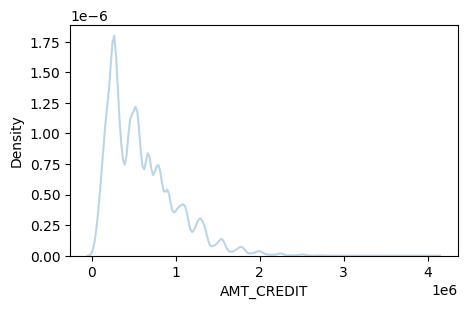

标准化后


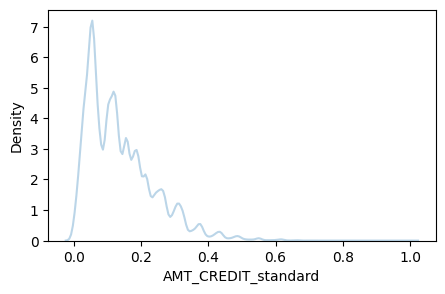

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
feature = 'AMT_CREDIT'
scaler.fit(train[[feature]])
train[feature + '_standard'] = scaler.transform(train[[feature]])
display(train[[feature, feature + '_standard']])

print('标准化前')
figure = plt.figure(figsize = (5, 3))
sns.kdeplot(data = train, 
            x = feature, 
            alpha = 0.3)
plt.show()

print('标准化后')
figure = plt.figure(figsize = (5, 3))
sns.kdeplot(data = train, 
            x = feature + '_standard', 
            alpha = 0.3)
plt.show()

##### Z-score标准化  
让数据分布在0周围，让所有变量方差=1  
多用于加入正则化的线性模型之前  
$  
X_{scaler} = (X-X_{mean}) / X_{std}
$  

,AMT_CREDIT,AMT_CREDIT_standard
0,406597.5,-0.478099
1,1293502.5,1.725436
2,135000.0,-1.152889
3,312682.5,-0.711433
4,513000.0,-0.213740
...,...,...
307502,254700.0,-0.855492
307503,269550.0,-0.818597
307504,677664.0,0.195371
307505,370107.0,-0.568761


标准化前


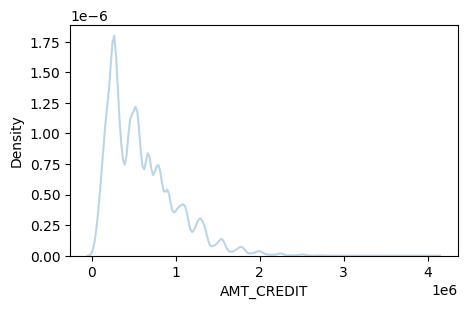

标准化后


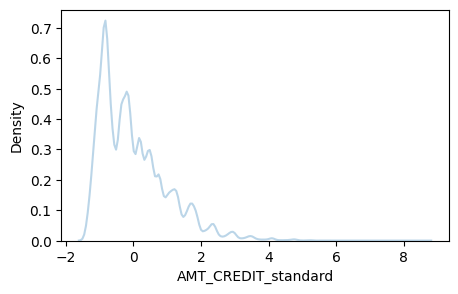

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
feature = 'AMT_CREDIT'
scaler.fit(train[[feature]])
train[feature + '_standard'] = scaler.transform(train[[feature]])
display(train[[feature, feature + '_standard']])

print('标准化前')
figure = plt.figure(figsize = (5, 3))
sns.kdeplot(data = train, 
            x = feature, 
            alpha = 0.3)
plt.show()

print('标准化后')
figure = plt.figure(figsize = (5, 3))
sns.kdeplot(data = train, 
            x = feature + '_standard', 
            alpha = 0.3)
plt.show()

### 特征衍生  
结构化数据中，一般结合具体场景来进行特征的衍生  
https://github.com/minerva-ml/open-solution-home-credit  

#### 比例类特征  

In [54]:
## 月还款额与月收入之比    
train['annuity_income_percentage'] = train['AMT_ANNUITY'] / train['AMT_INCOME_TOTAL']
## 家庭成员中儿童占比  
train['children_ratio'] = train['CNT_CHILDREN'] / train['CNT_FAM_MEMBERS']

derive_cols = ['annuity_income_percentage', 'children_ratio']

#### 聚合类特征

In [55]:
## 各学历的平均收入、中位数收入
train.groupby('NAME_EDUCATION_TYPE').AMT_INCOME_TOTAL.agg(['mean', 'median']).reset_index()

,NAME_EDUCATION_TYPE,mean,median
0,Academic degree,240009.146341,211500.0
1,Higher education,208652.053814,180000.0
2,Incomplete higher,181563.812397,157500.0
3,Lower secondary,130079.358491,112500.0
4,Secondary / secondary special,155158.512138,135000.0


#### 自动化特征衍生 Featuretools  
不推荐，可解释性差，资源消耗大  

#### 汇总

In [61]:
def derive(df):
    df['ANNUITY_INCOME_PERC'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
    df['CHILD_RATIO'] = df['CNT_CHILDREN'] / df['CNT_FAM_MEMBERS']
    agg = df.groupby('NAME_EDUCATION_TYPE').AMT_INCOME_TOTAL.agg(['mean', 'median']).reset_index()
    agg = agg.rename({'mean': 'EDUCATION_INCOME_MEAN', 'median': 'EDUCATION_INCOME_MEDIAN'}, axis = 1)
    return pd.merge(df, agg, on = 'NAME_EDUCATION_TYPE', how = 'left')

nderive_cols = ['ANNUITY_INCOME_PERC', 'CHILD_RATIO']
cderive_cols = ['EDUCATION_INCOME_MEAN', 'EDUCATION_INCOME_MEDIAN']
train = derive(train)
test = derive(test)

### 特征选择  
提升泛化性能  
提高可解释性  
提升训练速度  

#### 汇总现有所有特征  
剔除EDA中筛选出的异常特征  
加入衍生特征  

In [73]:
## 剔除EDA中筛选出的异常特征
drop_cols = {'SK_ID_CURR': 'id',  
             'FLAG_EMAIL': 'distribution gap',
             'FLAG_DOCUMENT_2': 'distribution gap',
             'FLAG_DOCUMENT_7': 'distribution gap',
             'FLAG_DOCUMENT_10': 'distribution gap',
             'FLAG_DOCUMENT_11': 'distribution gap',
             'FLAG_DOCUMENT_12': 'distribution gap',
             'FLAG_DOCUMENT_13': 'distribution gap',
             'FLAG_DOCUMENT_14': 'distribution gap',
             'FLAG_DOCUMENT_15': 'distribution gap',
             'FLAG_DOCUMENT_16': 'distribution gap',
             'FLAG_DOCUMENT_17': 'distribution gap',
             'FLAG_DOCUMENT_18': 'distribution gap',
             'FLAG_DOCUMENT_19': 'distribution gap',
             'FLAG_DOCUMENT_20': 'distribution gap',
             'FLAG_DOCUMENT_21': 'distribution gap',
             'AMT_REQ_CREDIT_BUREAU_HOUR': 'distribution gap',
             'AMT_REQ_CREDIT_BUREAU_DAY': 'distribution gap',
             'AMT_REQ_CREDIT_BUREAU_WEEK': 'distribution gap',
             'AMT_REQ_CREDIT_BUREAU_MON': 'distribution gap',
             'AMT_REQ_CREDIT_BUREAU_QRT': 'distribution gap',
             'NAME_INCOME_TYPE': 'distribution gap',
             'NAME_FAMILY_STATUS': 'distribution gap'}
use_cols = []
ncandidates = []
ccandidates = []
for feature in nfeatures:
    if not drop_cols.__contains__(feature): 
        ncandidates.append(feature)

for feature in cfeatures:
    if not drop_cols.__contains__(feature):
        ccandidates.append(feature)

## 加入衍生特征
nderive_cols = ['ANNUITY_INCOME_PERC', 'CHILD_RATIO']
cderive_cols = ['EDUCATION_INCOME_MEAN', 'EDUCATION_INCOME_MEDIAN']
ncandidates.extend(nderive_cols)
ccandidates.extend(cderive_cols)

print('候选数值特征', ncandidates)
print('候选类型特征', ccandidates)

候选数值特征 ['EXT_SOURCE_1', 'APARTMENTS_AVG', 'TOTALAREA_MODE', 'BASEMENTAREA_AVG', 'NONLIVINGAPARTMENTS_MODE', 'COMMONAREA_AVG', 'YEARS_BUILD_MEDI', 'LANDAREA_MEDI', 'APARTMENTS_MODE', 'EXT_SOURCE_3', 'DEF_30_CNT_SOCIAL_CIRCLE', 'YEARS_BUILD_MODE', 'LANDAREA_AVG', 'FLOORSMIN_AVG', 'APARTMENTS_MEDI', 'COMMONAREA_MEDI', 'CNT_CHILDREN', 'ENTRANCES_AVG', 'HOUR_APPR_PROCESS_START', 'DAYS_LAST_PHONE_CHANGE', 'NONLIVINGAREA_MEDI', 'NONLIVINGAREA_AVG', 'OWN_CAR_AGE', 'ENTRANCES_MODE', 'AMT_INCOME_TOTAL', 'LIVINGAPARTMENTS_MEDI', 'OBS_30_CNT_SOCIAL_CIRCLE', 'CNT_FAM_MEMBERS', 'FLOORSMAX_MEDI', 'DAYS_BIRTH', 'LIVINGAPARTMENTS_AVG', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'NONLIVINGAREA_MODE', 'AMT_CREDIT', 'ENTRANCES_MEDI', 'DAYS_ID_PUBLISH', 'YEARS_BEGINEXPLUATATION_MODE', 'LIVINGAREA_MODE', 'LANDAREA_MODE', 'LIVINGAREA_AVG', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_AVG', 'FLOORSMIN_MODE', 'YEARS_BEGINEXPLUATATION_AVG', 'REGION_POPULATION_RELATIVE', 'ELEVATORS_MODE', 'ELEVATORS_AVG', 'ELEVATORS_MEDI', 'COMMO

#### 方差选择  
删除方差低于某个阈值的所有特征  
不常用，不推荐  
sklearn.feature_selection.VarianceThreshold

In [117]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold = 0.01)
sel.fit(train[ncandidates])
high_var_cols = sel.get_feature_names_out()

print('剔除前特征数量为', len(ncandidates))
print('剩余特征数量为', len(high_var_cols))

剔除前特征数量为 66
剩余特征数量为 43


#### Information Value  
二分类中用于衡量特征预测能力的指标  
一般认为IV<0.02的特征可以剔除


$  
WOE_i=ln(\frac{count_i(y=1)}{count(y=1)})-ln(\frac{count_i(y=0)}{count(y=0)})  
$  
  
$
IV_i=(\frac{count_i(y=1)}{count(y=1)}-\frac{count_i(y=0)}{count(y=0)})*WOE_i
$  

$  
IV=\sum_{1}^{bins}IV_i
$

In [75]:
## 计算IV
def iv(df, feature):
    perc_1_total = df.TARGET.sum()
    perc_0_total = df.TARGET.count() - df.TARGET.sum()
    perc_1_bin = df.groupby(feature).TARGET.sum() 
    perc_0_bin = df.groupby(feature).TARGET.count() - df.groupby(feature).TARGET.sum()

    woe_i = np.log(perc_1_bin / perc_1_total) - np.log(perc_0_bin / perc_0_total)
    iv_i = (perc_1_bin / perc_1_total - perc_0_bin / perc_0_total) * woe_i
    iv_i = iv_i.replace(np.inf, 0)

    return iv_i.sum()

bins = 5
iv_data = []
for feature in ncandidates:
    train[feature + '_bin'] = pd.qcut(train[feature], nbins, duplicates = 'drop', labels = False)
    iv_data.append([feature, iv(train, feature + '_bin')])

for feature in ccandidates:
    iv_data.append([feature, iv(train, feature)])

iv_df = pd.DataFrame(iv_data, columns = ['feature', 'IV'])

In [81]:
## 剔除IV低于0.02的特征
low_iv_features = iv_df[iv_df.IV < 0.02].feature

3             BASEMENTAREA_AVG
4     NONLIVINGAPARTMENTS_MODE
5               COMMONAREA_AVG
6             YEARS_BUILD_MEDI
7                LANDAREA_MEDI
                ...           
94         EMERGENCYSTATE_MODE
95          NAME_CONTRACT_TYPE
96              HOUSETYPE_MODE
97             FLAG_DOCUMENT_9
98          FONDKAPREMONT_MODE
Name: feature, Length: 67, dtype: object

#### 循序特征选择   
##### 前向选择  
从模型中没有预测因素开始，反复添加最有帮助的预测因素，直到没有显著的预测变量选入回归方程  
##### 后向选择  
从完整模型（即包含所有可能预测变量的模型）中的所有预测变量开始，以迭代方式删除贡献最小的预测变量，直到没有不显著的预测变量从回归方程删除  

mlxtend.feature_selection

In [77]:
## 前向选择 
# import mlxtend 
# from mlxtend.feature_selection import SequentialFeatureSelector
# from sklearn.linear_model import LogisticRegression

# lr = LogisticRegression()
# sfs = SequentialFeatureSelector(estimator = lr, k_features = 3, scoring = 'roc_auc', forward = True)
# sfs.fit(train[encode_features], train['TARGET'])
# sfs.subsets_


STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

{}

#### 正则化  
正则化通常通过在损失函数中添加一个与模型复杂度相关的项来实现  
##### L1正则化  
##### L2正则化  

In [83]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty = 'l1', C = 0.1)
lr = LogisticRegression(penalty = 'l2', C = 0.1)
lr = LogisticRegression(penalty = 'elasticnet', C = 0.1)

#### 特征重要性  

In [94]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 5)
dt.fit(train[encode_features], train['TARGET'])
print('各特征重要性', dt.feature_importances_）

DecisionTreeClassifier(max_depth=5)

#### 汇总  
得到最终可以进入模型的特征  
本次采用以下两套方案  
1. 逻辑回归模型: 离散特征编码 + 数值特征离散化 + 基础特征剔除(EDA) + IV特征筛选 + 正则化  
2. LightGBM: 基础特征剔除(EDA) + 特征重要性筛选

In [118]:
## LR使用特征
nbins = 5
method = 'one-hot'
n_encode_features = []

for feature in ncandidates:
    train[feature + '_bin'], bins = pd.qcut(train[feature], nbins, duplicates = 'drop', retbins = True, labels = False)
    test[feature + '_bin'] = pd.cut(test[feature], bins, labels = False)
    new_features = encode(train, test, 'TARGET', feature + '_bin', method)
    n_encode_features.extend(new_features)

c_encode_features = []
for feature in ccandidates: 
    new_features = encode(train, test, 'TARGET', feature, method)
    c_encode_features.extend(new_features)

lr_features = n_encode_features + c_encode_features

,EXT_SOURCE_1_bin_0,EXT_SOURCE_1_bin_1,EXT_SOURCE_1_bin_2,EXT_SOURCE_1_bin_3,EXT_SOURCE_1_bin_4,EXT_SOURCE_1_bin_5,APARTMENTS_AVG_bin_0,APARTMENTS_AVG_bin_1,APARTMENTS_AVG_bin_2,APARTMENTS_AVG_bin_3,...,EDUCATION_INCOME_MEAN_0,EDUCATION_INCOME_MEAN_1,EDUCATION_INCOME_MEAN_2,EDUCATION_INCOME_MEAN_3,EDUCATION_INCOME_MEAN_4,EDUCATION_INCOME_MEDIAN_0,EDUCATION_INCOME_MEDIAN_1,EDUCATION_INCOME_MEDIAN_2,EDUCATION_INCOME_MEDIAN_3,EDUCATION_INCOME_MEDIAN_4
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
307507,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
307508,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
307509,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [122]:
## LightGBM使用特征
lgb_features = ncandidates + ccandidates